In [1]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.xception import Xception
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential

import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [3]:
IMAGE_SIZE =  [224,224]

xcep = Xception(input_shape=IMAGE_SIZE + [3],weights='imagenet', include_top=False)

for layer in xcep.layers :
  layer.trainable = False

83689472/83683744 [==============================] - 3s 0us/step


In [4]:
x = Flatten()(xcep.output)

prediction = Dense(2, activation='softmax')(x)

model = Model(inputs = xcep.input, outputs = prediction)

model.summary()


Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, 111, 111, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
block1_conv1_bn (BatchNormaliza (None, 111, 111, 32) 128         block1_conv1[0][0]               
__________________________________________________________________________________________________
block1_conv1_act (Activation)   (None, 111, 111, 32) 0           block1_conv1_bn[0][0]            
_______________________________________________________________________________________

In [5]:
model.compile(
    loss='categorical_crossentropy',
    optimizer = 'adam',
    metrics=['accuracy']
)

In [6]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory('/content/gdrive/My Drive/Datasets/Tp2d3d/train/',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

test_set = test_datagen.flow_from_directory('/content/gdrive/My Drive/Datasets/Tp2d3d/test/',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 1500 images belonging to 2 classes.
Found 1500 images belonging to 2 classes.


Instructions for updating:
Please use Model.fit, which supports generators.
47/47 [==============================] - 2121s 45s/step - loss: 0.6776 - accuracy: 0.9140 - val_loss: 0.7190 - val_accuracy: 0.9293


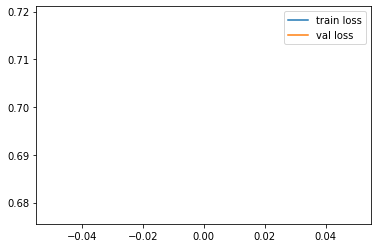

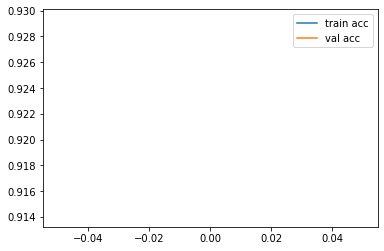

<Figure size 432x288 with 0 Axes>

In [7]:
r = model.fit_generator(
  training_set,
  validation_data=test_set
)
# loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# accuracies
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')